<a href="https://colab.research.google.com/github/AjeetSingh21/Project-SQAC/blob/main/Smart_expense_categorizer_SQAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
ds = pd.read_csv("Transactions.csv")


In [5]:
X = ds['text']

y = ds['label']



In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)



In [7]:
model = LogisticRegression(max_iter=500)
vect = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = vect.fit_transform(X_train)
X_test_tfidf = vect.transform(X_test)
model.fit(X_train_tfidf,y_train)
y_pred = model.predict(X_test_tfidf)


In [8]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))


Accuracy is:  1.0


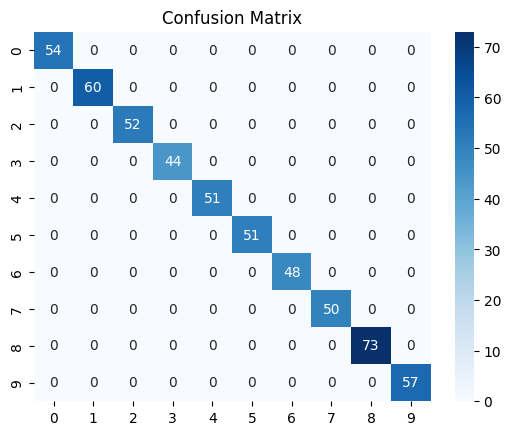

In [9]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


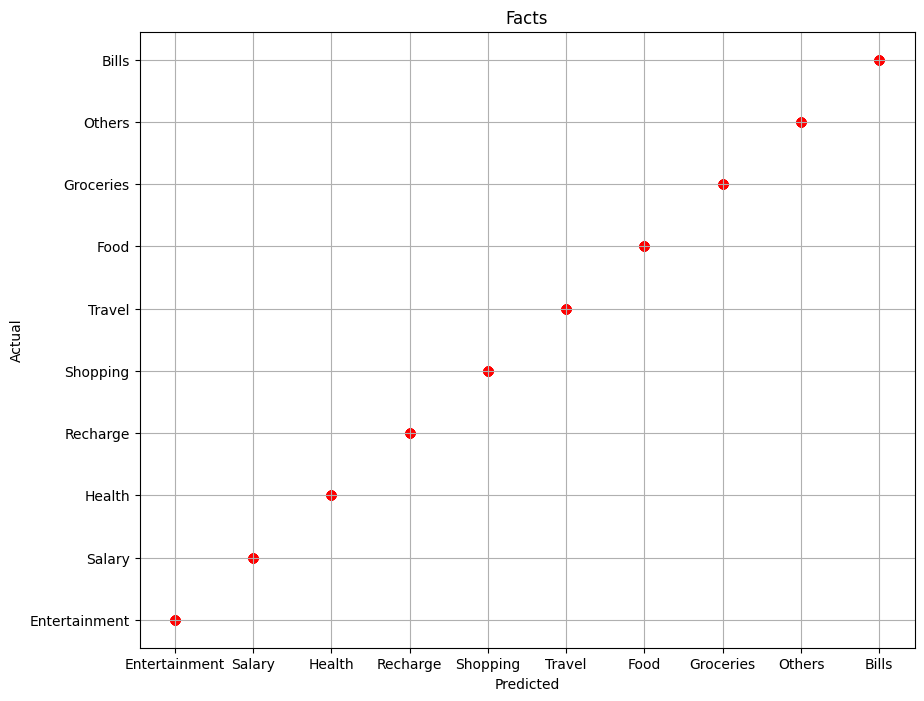

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred,y_test,color='red')
plt.title("Facts")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(True)
plt.show()


In [11]:
ps = precision_score(y_test,y_pred,average='macro')
print("The precision is: ",ps)
f1 = f1_score(y_test,y_pred, average='micro')
print("F1 Score is: ",f1)
cr = classification_report(y_test,y_pred)
print("CR: ",cr)

The precision is:  1.0
F1 Score is:  1.0
CR:                 precision    recall  f1-score   support

        Bills       1.00      1.00      1.00        54
Entertainment       1.00      1.00      1.00        60
         Food       1.00      1.00      1.00        52
    Groceries       1.00      1.00      1.00        44
       Health       1.00      1.00      1.00        51
       Others       1.00      1.00      1.00        51
     Recharge       1.00      1.00      1.00        48
       Salary       1.00      1.00      1.00        50
     Shopping       1.00      1.00      1.00        73
       Travel       1.00      1.00      1.00        57

     accuracy                           1.00       540
    macro avg       1.00      1.00      1.00       540
 weighted avg       1.00      1.00      1.00       540

